In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# PART 1 - LINEAR DATA

**Generate the data** 

In [2]:
# True parameters 
B0 = 10 # Intersect 
B1 = 5 # slope

In [3]:
# Generate the data 
X = np.random.normal(0, 10, size = 60)
# y = B0 + X * B1  + noise
y = B0 + X * B1  + np.random.normal(0,12,size = X.shape[0])

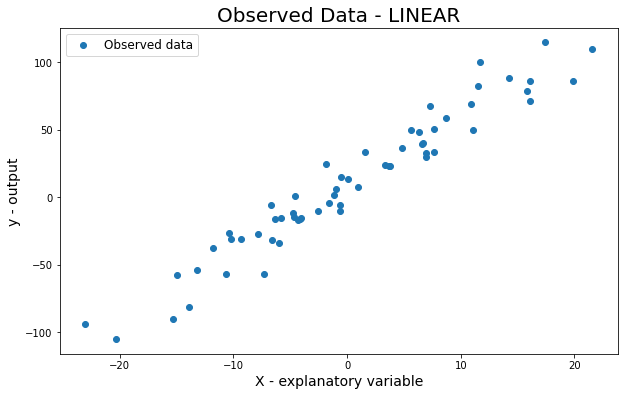

In [4]:
#Plot the data
plt.figure(figsize =(10,6))
plt.title('Observed Data - LINEAR', fontsize =20)
plt.scatter(X, y, label = 'Observed data')
plt.xlabel('X - explanatory variable', fontsize =14)
plt.ylabel('y - output', fontsize =14)
plt.legend(prop = {'size':12})
plt.show()

# 1 - Statistical estimation of B0 and B1 

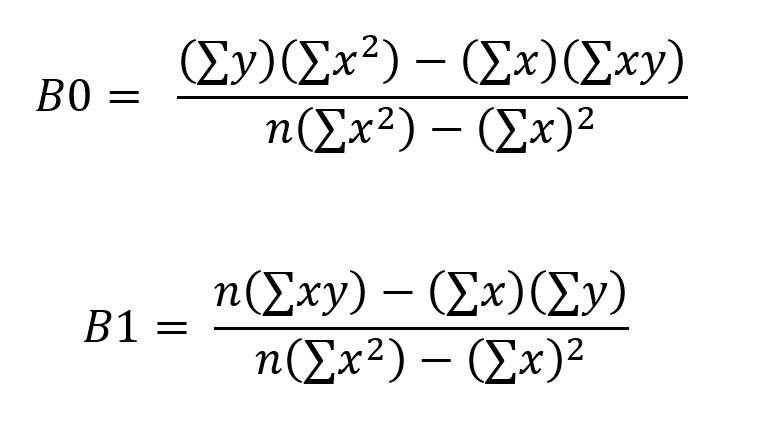

In [5]:
# Estimation of B0 and B1
B0_pred = (np.sum(y)* np.sum(X**2) - np.sum(X)* np.sum(X*y)) / (X.shape[0] * np.sum(X**2) - np.sum(X)**2)
B1_pred = (X.shape[0] * np.sum(X*y) - np.sum(X)* np.sum(y) ) / (X.shape[0] * np.sum(X**2) - np.sum(X)**2)

print(f'Predicted parameters: \nIntersect B0:  {B0_pred:.2f} \nSlope B1: {B1_pred:.2f}')
print('-------------')
print(f'True parameters:  \nIntercept B0: {B0} \nSlope B1: {B1}')

Predicted parameters: 
Intersect B0:  9.02 
Slope B1: 5.01
-------------
True parameters:  
Intercept B0: 10 
Slope B1: 5


In [6]:
## Calculate the MSE
# Make the prediction 
pred = X*B1_pred + B0_pred

# Calculate MSE
MSE = np.mean((y-pred)**2)
print(f"MSE: {MSE:.1f}")

MSE: 160.7


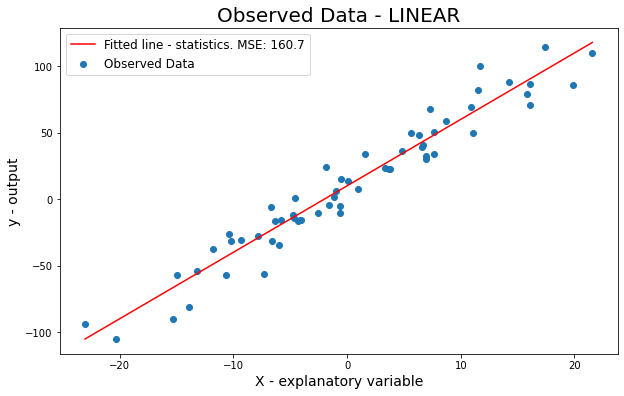

In [7]:
#Plot the data with fitted line
plt.figure(figsize =(10,6))
plt.title('Observed Data - LINEAR', fontsize =20)
plt.scatter(X, y, label = 'Observed Data')
plt.xlabel('X - explanatory variable', fontsize =14)
plt.ylabel('y - output', fontsize =14)
plt.plot(np.array([np.min(X), np.max(X)]), np.array([np.min(X), np.max(X)]) * B1 + B0, label = f'Fitted line - statistics. MSE: {MSE:.1f}', color = 'red')
plt.legend(prop ={'size':12})
plt.show()

# 2 - Ordinary Least Squares Linear Regression

In [8]:
# Import the LinearRegression class
from sklearn.linear_model import LinearRegression

# Instantiate the LinearRegression class
regressor = LinearRegression()

### Data preparation

In [9]:
# Check the shape of X
print(X.shape, y.shape)

(60,) (60,)


In [10]:
# Reshape X
Xr = X.reshape(-1,1)
print(Xr.shape)

(60, 1)


In [11]:
# Fit the model
model = regressor.fit(Xr, y)

In [12]:
# Collect the slope and intercept
B0_pred_OLS = model.intercept_
B1_pred_OLS = model.coef_[0]
print(f'Predicted parameters: \nIntersect B0:  {B0_pred_OLS:.2f} \nSlope B1: {B1_pred_OLS:.2f}')
print('-------------')
print(f'True parameters:  \nIntercept B0: {B0} \nSlope B1: {B1}')

Predicted parameters: 
Intersect B0:  9.02 
Slope B1: 5.01
-------------
True parameters:  
Intercept B0: 10 
Slope B1: 5


In [13]:
## Calculate the MSE
# Make the prediction 
pred_OLS = X.flatten()*B1_pred_OLS + B0_pred_OLS

# Calculate MSE
MSE = np.mean((y-pred_OLS)**2)
print(f"MSE: {MSE:.1f}")

MSE: 160.7


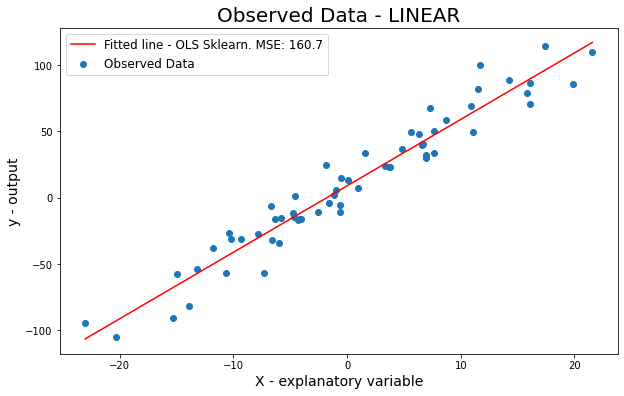

In [14]:
#Plot the data with fitted line
plt.figure(figsize =(10,6))
plt.title('Observed Data - LINEAR', fontsize =20)
plt.scatter(X, y, label = 'Observed Data')
plt.xlabel('X - explanatory variable', fontsize =14)
plt.ylabel('y - output', fontsize =14)
plt.plot(np.array([np.min(X), np.max(X)]), np.array([np.min(X), np.max(X)]) * B1_pred_OLS + B0_pred_OLS, label = f'Fitted line - OLS Sklearn. MSE: {MSE:.1f}', color = 'red')
plt.legend(prop ={'size':12})
plt.show()

# ------------------------------------------------------------------------------------------------------------

# PART 2 - POLYNOMIAL DATA

**Generate the data** 

In [15]:
## Create a 3rd order polynomial data
# Set the value of the slopes 
B0 = 2
B1_x = 2
B2_x2 = 6
B3_x3 = 1

# Generate the data 
X = np.random.normal(0, 5, size = 60)
# y  = B0 + B1_x*(X) + B2_x2*(X**2) + B3_x3*(X**3) + noise
y = B0 + B1_x * X + B2_x2*(X**2) + B3_x3*(X**3) + np.random.normal(0, 15, size = X.shape[0])

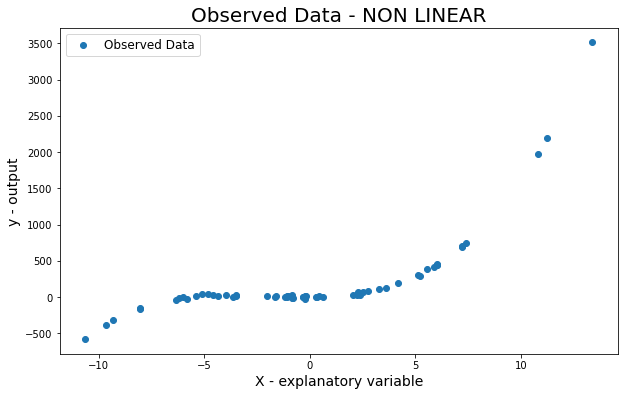

In [16]:
# Plot the data
plt.figure(figsize =(10,6))
plt.scatter(X, y, label = 'Observed Data')
plt.title('Observed Data - NON LINEAR', fontsize =20)
plt.xlabel('X - explanatory variable', fontsize =14)
plt.ylabel('y - output', fontsize =14)
plt.legend(prop ={'size':12})
plt.show()

# Ordinary least squares Linear Regression with 3rd order polynomial 

**Model:**

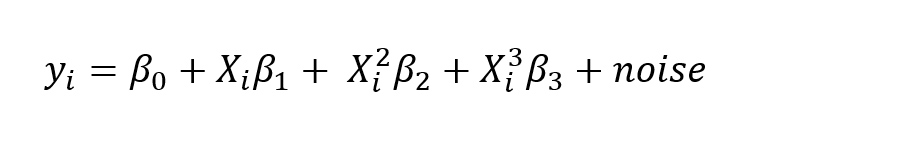

In [34]:
# Calculate the square and cube of X
Xr = X.reshape(-1,1)
X2 = Xr**2
X3 = Xr**3

# Concatenate original X with X^2 and X^3
X_conc = np.concatenate([Xr, X2, X3], axis = 1)
print('Original Shape of Data with X^1:', Xr.shape) # Initial shape of X
print('Shape of Data with X^1, X^2, X^3:', X_conc.shape)     # New X shape 
print('\n', X_conc[:5,:])  # check the array --> it has 3 columns X, X**2 and X**3

Original Shape of Data with X^1: (60, 1)
Shape of Data with X^1, X^2, X^3: (60, 3)

 [[-8.46218877e-01  7.16086388e-01 -6.05965820e-01]
 [-4.35192501e+00  1.89392513e+01 -8.24222011e+01]
 [ 3.62745205e+00  1.31584084e+01  4.77314955e+01]
 [-9.67605872e+00  9.36261123e+01 -9.05931760e+02]
 [ 1.33907925e+01  1.79313323e+02  2.40114749e+03]]


In [18]:
# Instantiate the LinearRegression class
regressor_pol = LinearRegression()

# Fit the model
model_pol = regressor_pol.fit(X_conc, y)

In [19]:
# Extract estimated parameters 
B0_poly = model_pol.intercept_
B1_x_poly = model_pol.coef_[0]
B2_x2_poly = model_pol.coef_[1]
B3_x3_poly = model_pol.coef_[2]

# Print the results
print(f'Predicted parameters: \nIntersect B0:  {B0_poly:.2f} \nSlope B1 for x term: {B1_x_poly:.2f} \nSlope B2 for x^2 term: {B2_x2_poly:.2f} \nSlope B3 for x^3 term: {B3_x3_poly:.2f}')
print('-------------')
print(f'True parameters:  \nIntercept B0: {B0} \nSlope B1 for x term: {B1_x} \nSlope B2 for x^2: {B2_x2} \nSlope B3 for x^3 term: {B3_x3}')

Predicted parameters: 
Intersect B0:  2.62 
Slope B1 for x term: 1.25 
Slope B2 for x^2 term: 5.88 
Slope B3 for x^3 term: 1.02
-------------
True parameters:  
Intercept B0: 2 
Slope B1 for x term: 2 
Slope B2 for x^2: 6 
Slope B3 for x^3 term: 1


In [20]:
## Calculate the MSE
# Get the fitted model predictions
pred_poly = model_pol.predict(X_conc)

# Calculate MSE
MSE = np.mean((y - pred_poly)**2)
print(f"MSE: {MSE:.1f}")

MSE: 168.8


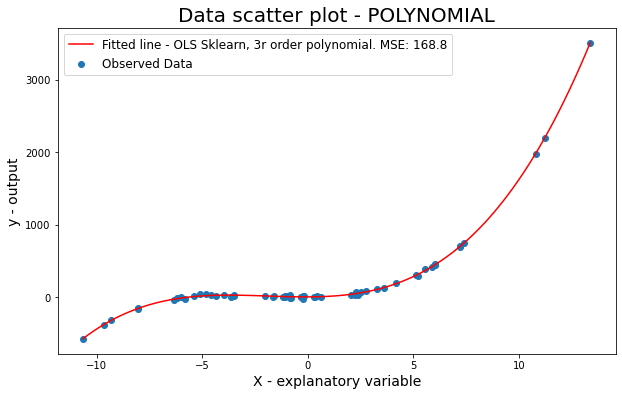

In [23]:
## Plot the data with fitted line
# Make the prediction 
interval_x = np.linspace(np.min(X), np.max(X), 100).reshape(-1,1)
interval_x2 = interval_x**2
interval_x3 = interval_x**3
interval_X = np.concatenate([interval_x, interval_x2, interval_x3], axis = 1)
y_pred_poly_on_interval_x = model_pol.predict(interval_X)

# Plot everything
plt.figure(figsize =(10,6))
plt.scatter(X, y, label = 'Observed Data')
plt.title('Data scatter plot - POLYNOMIAL', fontsize =20)
plt.xlabel('X - explanatory variable', fontsize =14)
plt.ylabel('y - output', fontsize =14)
plt.plot(interval_x,y_pred_poly_on_interval_x , label = f'Fitted line - OLS Sklearn, 3r order polynomial. MSE: {MSE:.1f}', color = 'red')
plt.legend(prop ={'size':12})
plt.show()